___
# Plotly and Cufflinks
* Plotly is an interactive visualization library
* Cufflinks connects plotly to pandas 

Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images).

## Installation

In order for this all to work, you'll need to install plotly and cufflinks to call plots directly off of a pandas dataframe. These libraries are not currently available through **conda** but are available through **pip**. Install the libraries at your command line/terminal using:

    pip install plotly
    pip install cufflinks

** NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work. **

## Imports and Set-up

In [1]:
#pip install plotly

In [2]:
#pip install cufflinks

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [5]:
import cufflinks as cf

In [6]:
#for notebooks
init_notebook_mode(connected =True)

In [7]:
#for offline use
cf.go_offline()

In [8]:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D '.split())
df.head()

,A,B,C,D
0,-0.192045,-0.223223,-0.817009,-2.921811
1,0.040485,0.083060,-0.533592,-1.629761
2,-0.393771,1.489419,0.345402,0.483357
3,-2.057895,0.382939,-0.763387,-1.473980
4,0.887040,-0.643179,0.769576,-0.506932


In [9]:
df2 = pd.DataFrame({'Category':'A B C'.split(),'Values':[32,43,50]})
df2.head()

,Category,Values
0,A,32
1,B,43
2,C,50


### Using Cufflinks and iplot()
* Kind of chart
                               scatter
                               bar
                               box
                               spread
                               ratio
                               heatmap
                               surface
                               histogram
                               bubble
                               bubble3d
                               scatter3d       
                               scattergeo
                               ohlc
                               candle
                               pie
                               choroplet

<AxesSubplot:>

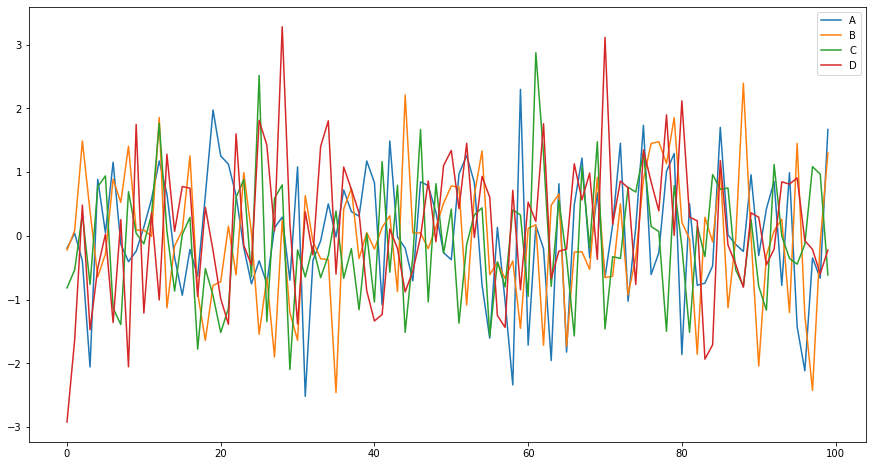

In [10]:
df.plot(figsize=(15,8))

In [11]:
df.iplot()

### Scatter plot

In [12]:
df.iplot(kind = 'scatter',x='A',theme='polar',y='B',mode='markers',size=10)

In [13]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [14]:
df.iplot(kind='scatter',x='A',theme='henanigans',y='B',mode='lines+markers',size=10)

### Bar plot

In [15]:
df2.iplot(kind='bar',x='Category',y='Values')

In [16]:
df.sum().iplot(kind='bar')

### Boxplots

In [17]:
df.iplot(kind='box')

In [18]:
df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,40,50],'z':[1,2,3,4,5]})

In [19]:
cf.colors.scales()

In [20]:
print(df3)
df3.iplot(kind='surface',colorscale='ylgnbu')

   x   y  z
0  1  10  1
1  2  20  2
2  3  30  3
3  4  40  4
4  5  50  5


In [21]:
import numpy as np
theta=np.arange(0,10,0.5)
X = np.sin(theta)
Y = np.cos(theta)
Z = X**2+Y**2
df3 = pd.DataFrame({'x':X,'y':Y,'z':Z})
print(df3.head())
df3.iplot(kind='surface',colorscale='rdylbu')

          x         y    z
0  0.000000  1.000000  1.0
1  0.479426  0.877583  1.0
2  0.841471  0.540302  1.0
3  0.997495  0.070737  1.0
4  0.909297 -0.416147  1.0


### Spread

In [22]:
df[['A','B']].iplot(kind='spread')

C:\Users\jaych\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\jaych\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



### histogram

In [23]:
df['A'].iplot(kind='hist')

In [24]:
df.iplot(kind='bubble',x='A',y='B',size='C')

### scatter_matrix

In [25]:
#similar to sns.pairplot
df.scatter_matrix()

In [26]:
df1 = pd.read_csv(r'C:\Users\jaych\Downloads\Refactored_Py_DS_ML_Bootcamp-master\10-Data-Capstone-Projects\911.csv')
df1.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [27]:
df1['Reason'] = df1['title'].apply(lambda x:x.split(':')[0])

In [28]:
import datetime
df1['timeStamp'] = pd.to_datetime(df1['timeStamp'])
df1['Month'] = df1['timeStamp'].apply(lambda x:x.month)
df1['Hour'] = df1['timeStamp'].apply(lambda x:x.hour)
df1['Dayofweek'] = df1['timeStamp'].apply(lambda x:x.dayofweek)

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df1['Dayofweek']=df1['Dayofweek'].map(dmap)

In [29]:
df2=df1.groupby(by=['Dayofweek','Hour']).count()['Reason'].unstack()
df2.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


In [30]:
df2.iplot(kind='heatmap',colorscale='blues')

### Pie Chart

In [31]:
df1.Reason.value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [32]:
d = pd.DataFrame(df1.Reason.value_counts())
d=d.reset_index();d

,index,Reason
0,EMS,48877
1,Traffic,35695
2,Fire,14920


In [33]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [34]:
d.iplot(kind='pie',labels='index',values='Reason',theme='polar')

In [35]:
d.iplot(kind='pie',labels='index',values='Reason',hoverinfo="label+name", hole=0.4, theme='white',title='Donut Chart')

### Choropleth Maps

In [36]:
df4 = pd.read_csv(r'C:\\Users\\jaych\\Downloads\\Refactored_Py_DS_ML_Bootcamp-master\\09-Geographical-Plotting\\2014_World_GDP')
df4.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [37]:
data = dict(
        type = 'choropleth',
        locations = df4['CODE'],
        z = df4['GDP (BILLIONS)'],
        text = df4['COUNTRY'],
        colorbar = {'title' : 'GDP Billions US'},
      )

In [38]:
layout = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)

In [39]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [40]:
df.iplot(kind='choropleth',data=[data],layout = layout)